In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
nba_seasondata = "Data/Seasons_Stats.csv"
nba_player = "Data/player_data.csv"
nba_data = "NBA_Season_Data.csv"


nba_data1 = pd.read_csv(nba_seasondata)
nba_data2 = pd.read_csv(nba_player)

In [3]:
nba_data2.head()
nba_data2 = nba_data2.rename(columns = {"name":"Player"})

In [4]:
nba_dataset = pd.merge(nba_data1, nba_data2, how='left',on='Player')
nba_dataset.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,year_start,year_end,position,height,weight,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,1949.0,1951.0,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1950.0,1952.0,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,1950.0,1954.0,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University


In [132]:
nba_college = nba_dataset[["Year", "Player", "Tm", "Age", "Pos", "height", "college",]]
nba_college.head()

,Year,Player,Tm,Age,Pos,height,college
0,1950.0,Curly Armstrong,FTW,31.0,G-F,5-11,Indiana University
1,1950.0,Cliff Barker,INO,29.0,SG,6-2,University of Kentucky
2,1950.0,Leo Barnhorst,CHS,25.0,SF,6-4,University of Notre Dame
3,1950.0,Ed Bartels,TOT,24.0,F,6-5,North Carolina State University
4,1950.0,Ed Bartels,DNN,24.0,F,6-5,North Carolina State University


In [139]:
nba_1990college = nba_college.loc[nba_college["Year"] == 1990.0]
nba_1990college = nba_1990college.loc[nba_1990college["Tm"] == "DET"]
nba_1990college

,Year,Player,Tm,Age,Pos,height,college
9809,1990.0,Mark Aguirre,DET,30.0,SF,6-6,DePaul University
9828,1990.0,William Bedford,DET,26.0,C,7-0,University of Memphis
9909,1990.0,Joe Dumars*,DET,26.0,SG,NaN,NaN
9916,1990.0,James Edwards,DET,34.0,C,7-0,University of Washington
9953,1990.0,Dave Greenwood,DET,32.0,PF,6-9,"University of California, Los Angeles"
9969,1990.0,Scott Hastings,DET,29.0,PF,6-10,University of Arkansas
9975,1990.0,Gerald Henderson,DET,34.0,PG,6-2,Virginia Commonwealth University
9976,1990.0,Gerald Henderson,DET,34.0,PG,6-5,Duke University
10007,1990.0,Vinnie Johnson,DET,33.0,SG,6-2,Baylor University
10024,1990.0,Stan Kimbrough,DET,23.0,PG,5-11,Xavier University


In [140]:
nba_1991college = nba_college.loc[nba_college["Year"] == 1991.0]
nba_1991college = nba_1991college.loc[nba_1991college["Tm"] == "CHI"]
nba_1991college

,Year,Player,Tm,Age,Pos,height,college
10304,1991.0,B.J. Armstrong,CHI,23.0,PG,6-2,University of Iowa
10352,1991.0,Bill Cartwright,CHI,33.0,C,7-1,University of San Francisco
10446,1991.0,Horace Grant,CHI,25.0,PF,6-10,Clemson University
10473,1991.0,Craig Hodges,CHI,30.0,SG,6-2,"California State University, Long Beach"
10477,1991.0,Dennis Hopson,CHI,25.0,SF,6-5,Ohio State University
10502,1991.0,Michael Jordan*,CHI,27.0,SG,NaN,NaN
10510,1991.0,Stacey King,CHI,24.0,PF,6-11,University of Oklahoma
10529,1991.0,Cliff Levingston,CHI,30.0,PF,6-8,Wichita State University
10590,1991.0,John Paxson,CHI,30.0,PG,6-2,University of Notre Dame
10593,1991.0,Will Perdue,CHI,25.0,C,7-0,Vanderbilt University


In [141]:
nba_1992college = nba_college.loc[nba_college["Year"] == 1992.0]
nba_1992college = nba_1992college.loc[nba_1992college["Tm"] == "CHI"]
nba_1992college

,Year,Player,Tm,Age,Pos,height,college
10766,1992.0,B.J. Armstrong,CHI,24.0,PG,6-2,University of Iowa
10827,1992.0,Bill Cartwright,CHI,34.0,C,7-1,University of San Francisco
10916,1992.0,Horace Grant,CHI,26.0,PF,6-10,Clemson University
10926,1992.0,Bob Hansen,CHI,31.0,SG,6-6,University of Iowa
10947,1992.0,Craig Hodges,CHI,31.0,SG,6-2,"California State University, Long Beach"
10950,1992.0,Dennis Hopson,CHI,26.0,SG,6-5,Ohio State University
10975,1992.0,Michael Jordan*,CHI,28.0,SG,NaN,NaN
10983,1992.0,Stacey King,CHI,25.0,PF,6-11,University of Oklahoma
11001,1992.0,Cliff Levingston,CHI,31.0,PF,6-8,Wichita State University
11054,1992.0,Chuck Nevitt,CHI,32.0,C,7-5,North Carolina State University


In [142]:
nba_1993college = nba_college.loc[nba_college["Year"] == 1993.0]
nba_1993college = nba_1993college.loc[nba_1993college["Tm"] == "CHI"]
nba_1993college

,Year,Player,Tm,Age,Pos,height,college
11240,1993.0,B.J. Armstrong,CHI,25.0,PG,6-2,University of Iowa
11265,1993.0,Ricky Blanton,CHI,26.0,SF,6-7,Louisiana State University
11293,1993.0,Bill Cartwright,CHI,35.0,C,7-1,University of San Francisco
11312,1993.0,Joe Courtney,CHI,23.0,PF,6-8,University of Southern Mississippi
11347,1993.0,Jo Jo,CHI,22.0,SG,NaN,NaN
11373,1993.0,Horace Grant,CHI,27.0,PF,6-10,Clemson University
11426,1993.0,Michael Jordan*,CHI,29.0,SG,NaN,NaN
11440,1993.0,Stacey King,CHI,26.0,C,6-11,University of Oklahoma
11481,1993.0,Rodney McCray,CHI,31.0,SF,6-7,University of Louisville
11504,1993.0,Ed Nealy,CHI,32.0,PF,6-7,Kansas State University


In [143]:
nba_1994college = nba_college.loc[nba_college["Year"] == 1994.0]
nba_1994college = nba_1994college.loc[nba_1994college["Tm"] == "HOU"]
nba_1994college

,Year,Player,Tm,Age,Pos,height,college
11739,1994.0,Scott Brooks,HOU,28.0,PG,5-11,"University of California, Irvine"
11748,1994.0,Matt Bullard,HOU,26.0,PF,6-10,University of Iowa
11760,1994.0,Sam Cassell,HOU,24.0,PG,6-3,Florida State University
11788,1994.0,Earl Cureton,HOU,36.0,PF,6-9,University of Detroit Mercy
11818,1994.0,Mario Elie,HOU,30.0,SF,6-5,American International College
11879,1994.0,Carl Herrera,HOU,27.0,PF,6-9,University of Houston
11887,1994.0,Robert Horry,HOU,23.0,SF,6-9,University of Alabama
11903,1994.0,Chris Jent,HOU,24.0,SF,6-7,Ohio State University
11982,1994.0,Vernon Maxwell,HOU,28.0,SG,6-4,University of Florida
12020,1994.0,Hakeem Olajuwon*,HOU,31.0,C,NaN,NaN


In [144]:
nba_1995college = nba_college.loc[nba_college["Year"] == 1995.0]
nba_1995college = nba_1995college.loc[nba_1995college["Tm"] == "HOU"]
nba_1995college

,Year,Player,Tm,Age,Pos,height,college
12222,1995.0,Tim Breaux,HOU,24.0,SF,6-7,University of Wyoming
12224,1995.0,Scott Brooks,HOU,29.0,PG,5-11,"University of California, Irvine"
12226,1995.0,Chucky Brown,HOU,26.0,SF,6-7,North Carolina State University
12238,1995.0,Adrian Caldwell,HOU,28.0,PF,6-8,Lamar University
12243,1995.0,Sam Cassell,HOU,25.0,PG,6-3,Florida State University
12249,1995.0,Pete Chilcutt,HOU,26.0,PF,6-10,University of North Carolina
12283,1995.0,Clyde Drexler*,HOU,32.0,SG,NaN,NaN
12302,1995.0,Mario Elie,HOU,31.0,SF,6-5,American International College
12358,1995.0,Carl Herrera,HOU,28.0,PF,6-9,University of Houston
12365,1995.0,Robert Horry,HOU,24.0,PF,6-9,University of Alabama


In [145]:
nba_1996college = nba_college.loc[nba_college["Year"] == 1996.0]
nba_1996college = nba_1996college.loc[nba_1996college["Tm"] == "CHI"]
nba_1996college

,Year,Player,Tm,Age,Pos,height,college
12700,1996.0,Randy Brown,CHI,27.0,PG,6-2,New Mexico State University
12702,1996.0,Jud Buechler,CHI,27.0,SF,6-6,University of Arizona
12707,1996.0,Jason Caffey,CHI,22.0,PF,6-8,University of Alabama
12775,1996.0,James Edwards,CHI,40.0,C,7-0,University of Washington
12831,1996.0,Jack Haley,CHI,32.0,C,6-10,"University of California, Los Angeles"
12846,1996.0,Ron Harper,CHI,32.0,PG,6-6,Miami University
12887,1996.0,Michael Jordan*,CHI,32.0,SG,NaN,NaN
12892,1996.0,Steve Kerr,CHI,30.0,PG,6-3,University of Arizona
12902,1996.0,Toni Kukoc,CHI,27.0,SF,6-10,NaN
12922,1996.0,Luc Longley,CHI,27.0,C,7-2,University of New Mexico


In [146]:
nba_1997college = nba_college.loc[nba_college["Year"] == 1997.0]
nba_1997college = nba_1997college.loc[nba_1997college["Tm"] == "CHI"]
nba_1997college

,Year,Player,Tm,Age,Pos,height,college
13272,1997.0,Randy Brown,CHI,28.0,PG,6-2,New Mexico State University
13275,1997.0,Jud Buechler,CHI,28.0,SF,6-6,University of Arizona
13282,1997.0,Jason Caffey,CHI,23.0,PF,6-8,University of Alabama
13340,1997.0,Bison Dele,CHI,27.0,C,6-9,University of Arizona
13427,1997.0,Ron Harper,CHI,33.0,PG,6-6,Miami University
13477,1997.0,Michael Jordan*,CHI,33.0,SG,NaN,NaN
13484,1997.0,Steve Kerr,CHI,31.0,PG,6-3,University of Arizona
13501,1997.0,Toni Kukoc,CHI,28.0,SF,6-10,NaN
13518,1997.0,Luc Longley,CHI,28.0,C,7-2,University of New Mexico
13613,1997.0,Robert Parish*,CHI,43.0,C,NaN,NaN


In [147]:
nba_1998college = nba_college.loc[nba_college["Year"] == 1998.0]
nba_1998college = nba_1998college.loc[nba_1998college["Tm"] == "CHI"]
nba_1998college

,Year,Player,Tm,Age,Pos,height,college
13855,1998.0,Keith Booth,CHI,23.0,SF,6-6,University of Maryland
13870,1998.0,Randy Brown,CHI,29.0,PG,6-2,New Mexico State University
13874,1998.0,Jud Buechler,CHI,29.0,SF,6-6,University of Arizona
13876,1998.0,Scott Burrell,CHI,27.0,SF,6-7,University of Connecticut
13880,1998.0,Jason Caffey,CHI,24.0,PF,6-8,University of Alabama
14006,1998.0,Ron Harper,CHI,34.0,PG,6-6,Miami University
14054,1998.0,Michael Jordan*,CHI,34.0,SG,NaN,NaN
14061,1998.0,Steve Kerr,CHI,32.0,PG,6-3,University of Arizona
14065,1998.0,Joe Kleine,CHI,36.0,C,6-11,University of Arkansas
14068,1998.0,Toni Kukoc,CHI,29.0,SF,6-10,NaN


In [148]:
nba_1999college = nba_college.loc[nba_college["Year"] == 1999.0]
nba_1999college = nba_1999college.loc[nba_1999college["Tm"] == "SAS"]
nba_1999college

,Year,Player,Tm,Age,Pos,height,college
14487,1999.0,Antonio Daniels,SAS,23.0,PG,6-4,Bowling Green State University
14513,1999.0,Tim Duncan,SAS,22.0,PF,6-11,Wake Forest University
14516,1999.0,Mario Elie,SAS,35.0,SG,6-5,American International College
14517,1999.0,Sean Elliott,SAS,30.0,SF,6-8,University of Arizona
14544,1999.0,Andrew Gaze,SAS,33.0,SG,6-7,Seton Hall University
14598,1999.0,Jaren Jackson,SAS,31.0,SG,6-4,Georgetown University
14606,1999.0,Avery Johnson,SAS,33.0,PG,5-10,Southern University and A&M College
14627,1999.0,Steve Kerr,SAS,33.0,PG,6-3,University of Arizona
14628,1999.0,Jerome Kersey,SAS,36.0,SF,6-7,Longwood University
14631,1999.0,Gerard King,SAS,26.0,SF,6-9,Nicholls State University


In [149]:
nba_2000college = nba_college.loc[nba_college["Year"] == 2000.0]
nba_2000college = nba_2000college.loc[nba_2000college["Tm"] == "LAL"]
nba_2000college

,Year,Player,Tm,Age,Pos,height,college
14967,2000.0,Kobe Bryant,LAL,21.0,SG,6-6,NaN
14988,2000.0,John Celestand,LAL,22.0,PG,6-4,Villanova University
15054,2000.0,Derek Fisher,LAL,25.0,PG,6-1,University of Arkansas at Little Rock
15058,2000.0,Rick Fox,LAL,30.0,SF,6-7,University of North Carolina
15071,2000.0,Devean George,LAL,22.0,SF,6-8,Augsburg College
15079,2000.0,A.C. Green,LAL,36.0,PF,6-9,Oregon State University
15089,2000.0,Ron Harper,LAL,36.0,PG,6-6,Miami University
15109,2000.0,Robert Horry,LAL,29.0,PF,6-9,University of Alabama
15126,2000.0,Sam Jacobson,LAL,24.0,PG,6-4,University of Minnesota
15162,2000.0,Travis Knight,LAL,25.0,C,7-0,University of Connecticut


In [150]:
nba_2001college = nba_college.loc[nba_college["Year"] == 2001.0]
nba_2001college = nba_2001college.loc[nba_2001college["Tm"] == "LAL"]
nba_2001college

,Year,Player,Tm,Age,Pos,height,college
15468,2001.0,Kobe Bryant,LAL,22.0,SG,6-6,NaN
15560,2001.0,Derek Fisher,LAL,26.0,PG,6-1,University of Arkansas at Little Rock
15563,2001.0,Greg Foster,LAL,32.0,C,6-11,University of Texas at El Paso
15565,2001.0,Rick Fox,LAL,31.0,SF,6-7,University of North Carolina
15579,2001.0,Devean George,LAL,23.0,SF,6-8,Augsburg College
15587,2001.0,Horace Grant,LAL,35.0,PF,6-10,Clemson University
15599,2001.0,Ron Harper,LAL,37.0,PG,6-6,Miami University
15618,2001.0,Robert Horry,LAL,30.0,PF,6-9,University of Alabama
15687,2001.0,Tyronn Lue,LAL,23.0,PG,6-0,University of Nebraska
15691,2001.0,Mark Madsen,LAL,25.0,PF,6-9,Stanford University


In [152]:
nba_2002college = nba_college.loc[nba_college["Year"] == 2002.0]
nba_2002college = nba_2002college.loc[nba_2002college["Tm"] == "LAL"]
nba_2002college

,Year,Player,Tm,Age,Pos,height,college
16025,2002.0,Kobe Bryant,LAL,23.0,SG,6-6,NaN
16057,2002.0,Joe Crispin,LAL,22.0,PG,6-0,Pennsylvania State University
16099,2002.0,Derek Fisher,LAL,27.0,PG,6-1,University of Arkansas at Little Rock
16109,2002.0,Rick Fox,LAL,32.0,SF,6-7,University of North Carolina
16121,2002.0,Devean George,LAL,24.0,SF,6-8,Augsburg College
16161,2002.0,Robert Horry,LAL,31.0,PF,6-9,University of Alabama
16169,2002.0,Lindsey Hunter,LAL,31.0,PG,6-2,Jackson State University
16230,2002.0,Mark Madsen,LAL,26.0,PF,6-9,Stanford University
16250,2002.0,Jelani McCoy,LAL,24.0,C,6-10,"University of California, Los Angeles"
16256,2002.0,Stanislav Medvedenko,LAL,22.0,C,6-10,NaN


In [153]:
nba_2003college = nba_college.loc[nba_college["Year"] == 2003.0]
nba_2003college = nba_2003college.loc[nba_2003college["Tm"] == "SAS"]
nba_2003college

,Year,Player,Tm,Age,Pos,height,college
16489,2003.0,Mengke Bateer,SAS,27.0,C,6-11,NaN
16507,2003.0,Bruce Bowen,SAS,31.0,SF,6-7,"California State University, Fullerton"
16518,2003.0,Devin Brown,SAS,24.0,SG,6-5,University of Texas at San Antonio
16550,2003.0,Speedy Claxton,SAS,24.0,PG,5-11,Hofstra University
16585,2003.0,Tim Duncan,SAS,26.0,PF,6-11,Wake Forest University
16593,2003.0,Danny Ferry,SAS,36.0,SF,6-10,Duke University
16613,2003.0,Manu Ginobili,SAS,25.0,SG,6-6,NaN
16619,2003.0,Anthony Goldwire,SAS,31.0,PG,6-1,University of Houston
16679,2003.0,Stephen Jackson,SAS,24.0,SG,6-8,Butler County Community College
16702,2003.0,Steve Kerr,SAS,37.0,PG,6-3,University of Arizona


In [154]:
nba_2004college = nba_college.loc[nba_college["Year"] == 2004.0]
nba_2004college = nba_2004college.loc[nba_2004college["Tm"] == "DET"]
nba_2004college

,Year,Player,Tm,Age,Pos,height,college
16974,2004.0,Chucky Atkins,DET,29.0,PG,5-11,University of South Florida
17001,2004.0,Chauncey Billups,DET,27.0,PG,6-3,University of Colorado
17048,2004.0,Elden Campbell,DET,35.0,C,6-11,Clemson University
17088,2004.0,Hubert Davis,DET,33.0,SG,6-5,University of North Carolina
17130,2004.0,Tremaine Fowlkes,DET,27.0,SF,6-8,"California State University, Fresno"
17165,2004.0,Darvin Ham,DET,30.0,SF,6-7,Texas Tech University
17166,2004.0,Richard Hamilton,DET,25.0,SG,6-6,University of Connecticut
17200,2004.0,Lindsey Hunter,DET,33.0,SG,6-2,Jackson State University
17216,2004.0,Mike James,DET,28.0,PG,6-2,Duquesne University
17217,2004.0,Mike James,DET,28.0,PG,6-1,Lamar University


In [155]:
nba_2005college = nba_college.loc[nba_college["Year"] == 2005.0]
nba_2005college = nba_2005college.loc[nba_2005college["Tm"] == "SAS"]
nba_2005college

,Year,Player,Tm,Age,Pos,height,college
17586,2005.0,Brent Barry,SAS,33.0,SG,6-6,Oregon State University
17610,2005.0,Bruce Bowen,SAS,33.0,SF,6-7,"California State University, Fullerton"
17623,2005.0,Devin Brown,SAS,26.0,SG,6-5,University of Texas at San Antonio
17704,2005.0,Tim Duncan,SAS,28.0,PF,6-11,Wake Forest University
17743,2005.0,Manu Ginobili,SAS,27.0,SG,6-6,NaN
17745,2005.0,Dion Glover,SAS,26.0,SG,6-5,Georgia Institute of Technology
17782,2005.0,Robert Horry,SAS,34.0,PF,6-9,University of Alabama
17834,2005.0,Linton Johnson,SAS,24.0,SF,6-8,Tulane University
17875,2005.0,Sean Marks,SAS,29.0,PF,6-10,University of California
17881,2005.0,Tony Massenburg,SAS,37.0,PF,6-9,University of Maryland


In [156]:
nba_2006college = nba_college.loc[nba_college["Year"] == 2006.0]
nba_2006college = nba_2006college[nba_2006college["Tm"] == "MIA"]
nba_2006college

,Year,Player,Tm,Age,Pos,height,college
18149,2006.0,Derek Anderson,MIA,31.0,SG,6-5,University of Kentucky
18150,2006.0,Shandon Anderson,MIA,32.0,SF,6-6,University of Georgia
18177,2006.0,Earl Barron,MIA,24.0,C,7-0,University of Memphis
18280,2006.0,Michael Doleac,MIA,28.0,C,6-11,University of Utah
18303,2006.0,Gerald Fitch,MIA,23.0,PG,6-3,University of Kentucky
18357,2006.0,Udonis Haslem,MIA,25.0,PF,6-8,University of Florida
18422,2006.0,Jason Kapono,MIA,24.0,SF,6-8,"University of California, Los Angeles"
18488,2006.0,Alonzo Mourning*,MIA,35.0,C,NaN,NaN
18511,2006.0,Shaquille O'Neal*,MIA,33.0,C,NaN,NaN
18535,2006.0,Gary Payton*,MIA,37.0,PG,NaN,NaN


In [157]:
nba_2007college = nba_college.loc[nba_college["Year"] == 2007.0]
nba_2007college = nba_2007college.loc[nba_2007college["Tm"] == "SAS"]
nba_2007college

,Year,Player,Tm,Age,Pos,height,college
18744,2007.0,Brent Barry,SAS,35.0,SG,6-6,Oregon State University
18763,2007.0,Matt Bonner,SAS,26.0,PF,6-10,University of Florida
18768,2007.0,Bruce Bowen,SAS,35.0,SF,6-7,"California State University, Fullerton"
18787,2007.0,Jackie Butler,SAS,21.0,C,6-10,NaN
18839,2007.0,Tim Duncan,SAS,30.0,C,6-11,Wake Forest University
18848,2007.0,Francisco Elson,SAS,30.0,C,7-0,University of California
18851,2007.0,Melvin Ely,SAS,28.0,C,6-10,"California State University, Fresno"
18858,2007.0,Michael Finley,SAS,33.0,SF,6-7,University of Wisconsin
18878,2007.0,Manu Ginobili,SAS,29.0,SG,6-6,NaN
18922,2007.0,Robert Horry,SAS,36.0,PF,6-9,University of Alabama


In [285]:
nba_2008college = nba_college.loc[nba_college["Year"] == 2008.0]
nba_2008college = nba_2008college.loc[nba_2008college["Tm"] == "BOS"]
nba_2008college

,Year,Player,Tm,Age,Pos,height,college
19251,2008.0,Ray Allen,BOS,32.0,SG,6-5,University of Connecticut
19252,2008.0,Tony Allen,BOS,26.0,SG,6-4,Oklahoma State University
19319,2008.0,P.J. Brown,BOS,38.0,PF,6-11,Louisiana Tech University
19337,2008.0,Sam Cassell,BOS,38.0,PG,6-3,Florida State University
19364,2008.0,Glen Davis,BOS,22.0,C,6-9,Louisiana State University
19422,2008.0,Kevin Garnett,BOS,31.0,PF,6-11,NaN
19490,2008.0,Eddie House,BOS,29.0,PG,6-1,Arizona State University
19677,2008.0,Kendrick Perkins,BOS,23.0,C,6-10,NaN
19682,2008.0,Paul Pierce,BOS,30.0,SF,6-7,University of Kansas
19684,2008.0,Scot Pollard,BOS,32.0,C,6-11,University of Kansas


In [158]:
nba_2009college = nba_college.loc[nba_college["Year"] == 2009.0]
nba_2009college = nba_2009college.loc[nba_2009college["Tm"] == "LAL"]
nba_2009college

,Year,Player,Tm,Age,Pos,height,college
19876,2009.0,Trevor Ariza,LAL,23.0,SF,6-8,"University of California, Los Angeles"
19944,2009.0,Shannon Brown,LAL,23.0,SG,6-4,Michigan State University
19945,2009.0,Kobe Bryant,LAL,30.0,SG,6-6,NaN
19949,2009.0,Andrew Bynum,LAL,21.0,C,7-0,NaN
20030,2009.0,Jordan Farmar,LAL,22.0,PG,6-2,"University of California, Los Angeles"
20036,2009.0,Derek Fisher,LAL,34.0,PG,6-1,University of Arkansas at Little Rock
20050,2009.0,Pau Gasol,LAL,28.0,C,7-0,NaN
20119,2009.0,Didier Ilunga-Mbenga,LAL,28.0,C,7-0,NaN
20216,2009.0,Chris Mihm,LAL,29.0,C,7-0,University of Texas at Austin
20238,2009.0,Adam Morrison,LAL,24.0,SF,6-8,Gonzaga University


In [159]:
nba_2010college = nba_college.loc[nba_college["Year"] == 2010.0]
nba_2010college = nba_2010college.loc[nba_2010college["Tm"] == "LAL"]
nba_2010college

,Year,Player,Tm,Age,Pos,height,college
20529,2010.0,Shannon Brown,LAL,24.0,SG,6-4,Michigan State University
20530,2010.0,Kobe Bryant,LAL,31.0,SG,6-6,NaN
20536,2010.0,Andrew Bynum,LAL,22.0,C,7-0,NaN
20605,2010.0,Jordan Farmar,LAL,23.0,PG,6-2,"University of California, Los Angeles"
20612,2010.0,Derek Fisher,LAL,35.0,PG,6-1,University of Arkansas at Little Rock
20624,2010.0,Pau Gasol,LAL,29.0,C,7-0,NaN
20714,2010.0,Didier Ilunga-Mbenga,LAL,29.0,C,7-0,NaN
20841,2010.0,Adam Morrison,LAL,25.0,SF,6-8,Gonzaga University
20863,2010.0,Lamar Odom,LAL,30.0,PF,6-10,University of Rhode Island
20884,2010.0,Josh Powell,LAL,27.0,PF,6-9,North Carolina State University


In [161]:
nba_2011college = nba_college.loc[nba_college["Year"] == 2011.0]
nba_2011college = nba_2011college.loc[nba_2011college["Tm"] == "DAL"]
nba_2011college

,Year,Player,Tm,Age,Pos,height,college
21035,2011.0,Alexis Ajinca,DAL,22.0,C,7-2,NaN
21074,2011.0,J.J. Barea,DAL,26.0,PG,6-0,Northeastern University
21091,2011.0,Rodrigue Beaubois,DAL,22.0,PG,6-0,NaN
21119,2011.0,Corey Brewer,DAL,24.0,SG,6-9,University of Florida
21132,2011.0,Caron Butler,DAL,30.0,SF,6-7,University of Connecticut
21141,2011.0,Brian Cardinal,DAL,33.0,SF,6-8,Purdue University
21157,2011.0,Tyson Chandler,DAL,28.0,C,7-1,NaN
21310,2011.0,Brendan Haywood,DAL,31.0,C,7-0,University of North Carolina
21375,2011.0,Dominique Jones,DAL,22.0,SG,6-4,University of South Florida
21381,2011.0,Jason Kidd,DAL,37.0,PG,6-4,University of California


In [162]:
nba_2012college = nba_college.loc[nba_college["Year"] == 2012.0]
nba_2012college = nba_2012college.loc[nba_2012college["Tm"] == "MIA"]
nba_2012college

,Year,Player,Tm,Age,Pos,height,college
21682,2012.0,Joel Anthony,MIA,29.0,C,6-9,"University of Nevada, Las Vegas"
21701,2012.0,Shane Battier,MIA,33.0,SF,6-8,Duke University
21722,2012.0,Chris Bosh,MIA,27.0,PF,6-11,Georgia Institute of Technology
21755,2012.0,Mario Chalmers,MIA,25.0,PG,6-2,University of Kansas
21760,2012.0,Norris Cole,MIA,23.0,PG,6-2,Cleveland State University
21773,2012.0,Eddy Curry,MIA,29.0,C,7-0,NaN
21857,2012.0,Mickell Gladness,MIA,25.0,PF,6-11,Alabama A&M University
21883,2012.0,Terrel Harris,MIA,24.0,SG,6-5,Oklahoma State University
21885,2012.0,Udonis Haslem,MIA,31.0,PF,6-8,University of Florida
21918,2012.0,Juwan Howard,MIA,38.0,PF,6-9,University of Michigan


In [289]:
nba_2013college = nba_college.loc[nba_college["Year"] == 2013.0]
nba_2013college = nba_2013college.loc[nba_2013college["Tm"] == "MIA"]
nba_2013college

,Year,Player,Tm,Age,Pos,height,college
22237,2013.0,Ray Allen,MIA,37.0,SG,6-5,University of Connecticut
22244,2013.0,Chris Andersen,MIA,34.0,C,6-10,Blinn College
22251,2013.0,Joel Anthony,MIA,30.0,C,6-9,"University of Nevada, Las Vegas"
22271,2013.0,Shane Battier,MIA,34.0,SF,6-8,Duke University
22293,2013.0,Chris Bosh,MIA,28.0,C,6-11,Georgia Institute of Technology
22320,2013.0,Mario Chalmers,MIA,26.0,PG,6-2,University of Kansas
22326,2013.0,Norris Cole,MIA,24.0,PG,6-2,Cleveland State University
22438,2013.0,Josh Harrellson,MIA,23.0,C,6-10,University of Kentucky
22442,2013.0,Terrel Harris,MIA,25.0,SG,6-5,Oklahoma State University
22447,2013.0,Udonis Haslem,MIA,32.0,PF,6-8,University of Florida


In [163]:
nba_2014college = nba_college.loc[nba_college["Year"] == 2014.0]
nba_2014college = nba_2014college.loc[nba_2014college["Tm"] == "SAS"]
nba_2014college

,Year,Player,Tm,Age,Pos,height,college
22849,2014.0,Jeff Ayres,SAS,26.0,PF,6-9,Arizona State University
22864,2014.0,Aron Baynes,SAS,27.0,C,6-10,Washington State University
22870,2014.0,Marco Belinelli,SAS,27.0,SF,6-5,NaN
22885,2014.0,Matt Bonner,SAS,33.0,PF,6-10,University of Florida
22904,2014.0,Shannon Brown,SAS,28.0,SG,6-4,Michigan State University
22972,2014.0,Austin Daye,SAS,25.0,SF,6-11,Gonzaga University
22974,2014.0,Nando De,SAS,26.0,SF,NaN,NaN
22985,2014.0,Boris Diaw,SAS,31.0,PF,6-8,NaN
22994,2014.0,Tim Duncan,SAS,37.0,C,6-11,Wake Forest University
23034,2014.0,Manu Ginobili,SAS,36.0,SG,6-6,NaN


In [164]:
nba_2015college = nba_college.loc[nba_college["Year"] == 2015.0]
nba_2015college = nba_2015college.loc[nba_2015college["Tm"] == "GSW"]
nba_2015college

,Year,Player,Tm,Age,Pos,height,college
23470,2015.0,Leandro Barbosa,GSW,32.0,SG,6-3,NaN
23473,2015.0,Harrison Barnes,GSW,22.0,SF,6-8,University of North Carolina
23500,2015.0,Andrew Bogut,GSW,30.0,C,7-0,University of Utah
23571,2015.0,Stephen Curry,GSW,26.0,PG,6-3,Davidson College
23625,2015.0,Festus Ezeli,GSW,25.0,C,6-11,Vanderbilt University
23666,2015.0,Draymond Green,GSW,24.0,PF,6-7,Michigan State University
23711,2015.0,Justin Holiday,GSW,25.0,SG,6-6,University of Washington
23720,2015.0,Andre Iguodala,GSW,31.0,SF,6-6,University of Arizona
23777,2015.0,Ognjen Kuzmic,GSW,24.0,C,7-1,NaN
23788,2015.0,David Lee,GSW,31.0,PF,6-7,University of San Francisco


In [165]:
nba_2016college = nba_college.loc[nba_college["Year"] == 2016.0]
nba_2016college = nba_2016college.loc[nba_2016college["Tm"] == "CLE"]
nba_2016college

,Year,Player,Tm,Age,Pos,height,college
24216,2016.0,Jared Cunningham,CLE,24.0,SG,6-4,Oregon State University
24227,2016.0,Matthew Dellavedova,CLE,25.0,PG,6-4,Saint Mary's College of California
24271,2016.0,Channing Frye,CLE,32.0,C,6-11,University of Arizona
24316,2016.0,Joe Harris,CLE,24.0,SG,6-6,University of Virginia
24367,2016.0,Kyrie Irving,CLE,23.0,PG,6-3,Duke University
24370,2016.0,LeBron James,CLE,31.0,SF,6-8,NaN
24373,2016.0,Richard Jefferson,CLE,35.0,SF,6-7,University of Arizona
24395,2016.0,Dahntay Jones,CLE,35.0,SF,6-6,Duke University
24396,2016.0,James Jones,CLE,35.0,SF,6-8,University of Miami
24405,2016.0,Sasha Kaun,CLE,30.0,C,6-11,University of Kansas


In [166]:
nba_2017college = nba_college.loc[nba_college["Year"] == 2017.0]
nba_2017college = nba_2017college.loc[nba_2017college["Tm"] == "GSW"]
nba_2017college

,Year,Player,Tm,Age,Pos,height,college
24726,2017.0,Matt Barnes,GSW,36.0,SF,6-7,"University of California, Los Angeles"
24792,2017.0,Ian Clark,GSW,25.0,SG,6-3,Belmont University
24812,2017.0,Stephen Curry,GSW,28.0,PG,6-3,Davidson College
24838,2017.0,Kevin Durant,GSW,28.0,SF,6-9,University of Texas at Austin
24897,2017.0,Draymond Green,GSW,26.0,PF,6-7,Michigan State University
24954,2017.0,Andre Iguodala,GSW,33.0,SF,6-6,University of Arizona
24983,2017.0,Damian Jones,GSW,21.0,C,7-0,Vanderbilt University
25025,2017.0,Shaun Livingston,GSW,31.0,PG,6-7,NaN
25027,2017.0,Kevon Looney,GSW,20.0,C,6-9,"University of California, Los Angeles"
25042,2017.0,James Michael,GSW,24.0,PF,NaN,NaN


In [167]:
nba_2018college = nba_college.loc[nba_college["Year"] == 2018.0]
nba_2018college = nba_2018college.loc[nba_2018college["Tm"] == "GSW"]
nba_2018college

,Year,Player,Tm,Age,Pos,height,college


In [65]:
# Read in data Height
general_heights = pd.read_csv("Data/Seasons_Stats.csv")
general_heights = pd.read_csv("Data/player_data.csv")

nba_data = pd.read_csv("Data/Seasons_Stats.csv")
nba_data = pd.read_csv("Data/player_data.csv")
nba_heights =nba_data["height"]

In [168]:
#["Year","Tm", Height] average height 
nba_year = nba_college.loc[(nba_college["Year"]>= 1990)&(nba_college["Year"]<2018),["Year","Tm","height"]].copy()
nba_year.head()

,Year,Tm,height
9807,1990.0,ORL,6-11
9808,1990.0,DEN,5-10
9809,1990.0,DET,6-6
9810,1990.0,SAC,6-4
9811,1990.0,WSB,6-8


In [172]:
# nba_1950noncollege 
nba_1990noncollege = nba_1990college.loc[nba_college["Year"] == 1990.0]
nba_1990noncollege = nba_1990college.loc[nba_1990college["Tm"] != "DET"]
nba_1990noncollege = nba_1990college["height"].mean 
nba_1990noncollege

<bound method Series.mean of 9809      6-6
9828      7-0
9909      NaN
9916      7-0
9953      6-9
9969     6-10
9975      6-2
9976      6-5
10007     6-2
10024    5-11
10032    6-11
10046     6-6
10155     NaN
10163    6-11
10211     NaN
Name: height, dtype: object>

In [173]:
nba_1991noncollege = nba_1991college.loc[nba_college["Year"] == 1991.0]
nba_1991noncollege = nba_1991college.loc[nba_1991college["Tm"] != "CHI"]
nba_1991noncollege = nba_1991college["height"].mean                                      
nba_1991noncollege

<bound method Series.mean of 10304     6-2
10352     7-1
10446    6-10
10473     6-2
10477     6-5
10502     NaN
10510    6-11
10529     6-8
10590     6-2
10593     7-0
10605     NaN
10727    6-10
Name: height, dtype: object>

In [174]:
nba_1992noncollege = nba_1992college.loc[nba_college["Year"] == 1992.0]
nba_1992noncollege = nba_1992college.loc[nba_1992college["Tm"] != "CHI"]
nba_1992noncollege = nba_1992college["height"].mean                                      
nba_1992noncollege

<bound method Series.mean of 10766     6-2
10827     7-1
10916    6-10
10926     6-6
10947     6-2
10950     6-5
10975     NaN
10983    6-11
11001     6-8
11054     7-5
11066     6-2
11069     7-0
11081     NaN
11093     6-8
11152     6-2
11208    6-10
Name: height, dtype: object>

In [175]:
nba_1993noncollege = nba_1993college.fillna(0)
nba_1993noncollege = nba_1993college.loc[nba_college["Year"] == 1993.0]
nba_1993noncollege = nba_1993college.loc[nba_1993college["Tm"] != "CHI"]
nba_1993noncollege = nba_1993college["height"].mean                                      
nba_1993noncollege

<bound method Series.mean of 11240     6-2
11265     6-7
11293     7-1
11312     6-8
11347     NaN
11373    6-10
11426     NaN
11440    6-11
11481     6-7
11504     6-7
11524     6-2
11528     7-0
11538     NaN
11631     6-5
11638     6-4
11654     6-2
11667    6-10
Name: height, dtype: object>

In [178]:
nba_1994noncollege = nba_1994college.loc[nba_college["Year"] == 1994.0]
nba_1994noncollege = nba_1994college.loc[nba_1994college["Tm"] != "HOU"]
nba_1994noncollege = nba_1994college["height"].mean                                      
nba_1994noncollege

<bound method Series.mean of 11739    5-11
11748    6-10
11760     6-3
11788     6-9
11818     6-5
11879     6-9
11887     6-9
11903     6-7
11982     6-4
12020     NaN
12040    6-10
12060     7-0
12066     6-3
12096     6-3
12119     6-9
Name: height, dtype: object>

In [179]:

nba_1995noncollege = nba_1995college.loc[nba_college["Year"] == 1995.50]
nba_1995noncollege = nba_1995college.loc[nba_1995college["Tm"] != "HOU"]
nba_1995noncollege = nba_1995college["height"].mean                                      
nba_1995noncollege

<bound method Series.mean of 12222     6-7
12224    5-11
12226     6-7
12238     6-8
12243     6-3
12249    6-10
12283     NaN
12302     6-5
12358     6-9
12365     6-9
12385     6-9
12386     6-8
12387     6-3
12443     6-4
12471     6-7
12480     NaN
12560     6-3
12582     7-0
12587     6-9
Name: height, dtype: object>

In [180]:
nba_1996noncollege = nba_1996college.loc[nba_college["Year"] == 1996.0]
nba_1996noncollege = nba_1996college.loc[nba_1996college["Tm"] != "CHI"]
nba_1996noncollege = nba_1996college["height"].mean                                      
nba_1996noncollege

<bound method Series.mean of 12700     6-2
12702     6-6
12707     6-8
12775     7-0
12831    6-10
12846     6-6
12887     NaN
12892     6-3
12902    6-10
12922     7-2
13024     NaN
13062     NaN
13078    6-11
13089     6-9
13164     7-0
Name: height, dtype: object>

In [181]:
nba_1997noncollege = nba_1997college.loc[nba_college["Year"] == 1997.0]
nba_1997noncollege = nba_1997college.loc[nba_1997college["Tm"] != "CHI"]
nba_1997noncollege = nba_1997college["height"].mean                                      
nba_1997noncollege

<bound method Series.mean of 13272     6-2
13275     6-6
13282     6-8
13340     6-9
13427     6-6
13477     NaN
13484     6-3
13501    6-10
13518     7-2
13613     NaN
13627     NaN
13661     NaN
13695     6-9
13719     6-7
13762     7-0
Name: height, dtype: object>

In [182]:
nba_1998noncollege = nba_1998college.loc[nba_college["Year"] == 1998.0]
nba_1998noncollege = nba_1998college.loc[nba_1998college["Tm"] != "CHI"]
nba_1998noncollege = nba_1998college["height"].mean                                      
nba_1998noncollege

<bound method Series.mean of 13855     6-6
13870     6-2
13874     6-6
13876     6-7
13880     6-8
14006     6-6
14054     NaN
14061     6-3
14065    6-11
14068    6-10
14072     6-2
14082     7-2
14170     NaN
14206     NaN
14241     6-9
14316    6-11
14317     6-9
14339     7-0
Name: height, dtype: object>

In [183]:
nba_1999noncollege = nba_1999college.loc[nba_college["Year"] == 1999.0]
nba_1999noncollege = nba_1999college.loc[nba_1999college["Tm"] != "SAS"]
nba_1990noncollege = nba_1999college["height"].mean                                      
nba_1990noncollege

<bound method Series.mean of 14487     6-4
14513    6-11
14516     6-5
14517     6-8
14544     6-7
14598     6-4
14606    5-10
14627     6-3
14628     6-7
14631     6-9
14737     7-0
14776     NaN
14787     6-7
14875     6-6
Name: height, dtype: object>

In [184]:
nba_2000noncollege = nba_2000college.loc[nba_college["Year"] == 2000.0]
nba_2000noncollege = nba_2000college.loc[nba_2000college["Tm"] != "LAL"]
nba_2000noncollege = nba_2000college["height"].mean                                      
nba_2000noncollege

<bound method Series.mean of 14967     6-6
14988     6-4
15054     6-1
15058     6-7
15071     6-8
15079     6-9
15089     6-6
15109     6-9
15126     6-4
15162     7-0
15182     6-0
15242     NaN
15289     6-7
15290     6-6
15310    6-11
15314     6-6
Name: height, dtype: object>

In [185]:
nba_2001noncollege = nba_2001college.loc[nba_college["Year"] == 2001.0]
nba_2001noncollege = nba_2001college.loc[nba_2001college["Tm"] != "LAL"]
nba_2001noncollege = nba_2001college["height"].mean                                      
nba_2001noncollege

<bound method Series.mean of 15468     6-6
15560     6-1
15563    6-11
15565     6-7
15579     6-8
15587    6-10
15599     6-6
15618     6-9
15687     6-0
15691     6-9
15726    6-10
15773     NaN
15799     6-3
15831     6-5
15858     6-6
Name: height, dtype: object>

In [186]:
nba_2002noncollege = nba_2002college.loc[nba_college["Year"] == 2002.0]
nba_2002noncollege = nba_2002college.loc[nba_2002college["Tm"] != "LAL"]
nba_2002noncollege = nba_2002college["height"].mean                                      
nba_2002noncollege

<bound method Series.mean of 16025     6-6
16057     6-0
16099     6-1
16109     6-7
16121     6-8
16161     6-9
16169     6-2
16230     6-9
16250    6-10
16256    6-10
16293     NaN
16318     6-3
16349     NaN
16374     6-6
16430     6-9
Name: height, dtype: object>

In [187]:
nba_2003noncollege = nba_2003college.loc[nba_college["Year"] == 2003.0]
nba_2003noncollege = nba_2003college.loc[nba_2003college["Tm"] != "SAS"]
nba_2003noncollege = nba_2003college["height"].mean                                      
nba_2003noncollege

<bound method Series.mean of 16489    6-11
16507     6-7
16518     6-5
16550    5-11
16585    6-11
16593    6-10
16613     6-6
16619     6-1
16679     6-8
16702     6-3
16802     6-2
16836     NaN
16843     6-7
16869     6-7
16945     7-0
Name: height, dtype: object>

In [188]:
nba_2004noncollege = nba_2004college.loc[nba_college["Year"] == 2004.0]
nba_2004noncollege = nba_2004college.loc[nba_2004college["Tm"] != "DET"]
nba_2004noncollege = nba_2004college["height"].mean                                      
nba_2004noncollege

<bound method Series.mean of 16974    5-11
17001     6-3
17048    6-11
17088     6-5
17130     6-8
17165     6-7
17166     6-6
17200     6-2
17216     6-2
17217     6-1
17304     7-0
17345    6-11
17386     6-9
17396     7-0
17455     6-5
17490     6-9
17496    6-10
17536     6-7
Name: height, dtype: object>

In [190]:
nba_2005noncollege = nba_2005college.loc[nba_college["Year"] == 2005.0]
nba_2005noncollege = nba_2005college.loc[nba_2005college["Tm"] != "SAS"]
nba_2005noncollege = nba_2005college["height"].mean                                      
nba_2005noncollege

<bound method Series.mean of 17586     6-6
17610     6-7
17623     6-5
17704    6-11
17743     6-6
17745     6-5
17782     6-9
17834     6-8
17875    6-10
17881     6-9
17907    6-10
17930     7-0
17954     6-2
17993     6-7
17994     6-6
18000     6-7
18073     6-3
18116    5-10
Name: height, dtype: object>

In [191]:
nba_2006noncollege = nba_2006college.loc[nba_college["Year"] == 2006.0]
nba_2006noncollege = nba_2006college.loc[nba_2006college["Tm"] != "MIA"]
nba_2006noncollege = nba_2006college["height"].mean                                      
nba_2006noncollege

<bound method Series.mean of 18149     6-5
18150     6-6
18177     7-0
18280    6-11
18303     6-3
18357     6-8
18422     6-8
18488     NaN
18511     NaN
18535     NaN
18545     6-8
18588     6-9
18663     6-4
18665     6-8
18670     6-6
18697     6-1
18709     6-9
Name: height, dtype: object>

In [192]:
nba_2007noncollege = nba_2007college.loc[nba_college["Year"] == 2007.0]
nba_2007noncollege = nba_2007college.loc[nba_2007college["Tm"] != "SAS"]
nba_2007noncollege = nba_2007college["height"].mean                               
nba_2007noncollege

<bound method Series.mean of 18744     6-6
18763    6-10
18768     6-7
18787    6-10
18839    6-11
18848     7-0
18851    6-10
18858     6-7
18878     6-6
18922     6-9
19070    6-10
19085     6-2
19188     6-3
19190     6-1
19213     6-7
19221     6-8
Name: height, dtype: object>

In [286]:
nba_2008noncollege = nba_2008college.loc[nba_college["Year"] == 2008.0]
nba_2008noncollege = nba_2008college.loc[nba_2008college["Tm"] != "BOS"]
nba_2008noncollege = nba_2008college["height"].mean                                      
nba_2008noncollege

<bound method Series.mean of 19251     6-5
19252     6-4
19319    6-11
19337     6-3
19364     6-9
19422    6-11
19490     6-1
19677    6-10
19682     6-7
19684    6-11
19685     6-8
19686     6-8
19691     6-4
19712     6-1
19720     6-9
Name: height, dtype: object>

In [195]:
nba_2009noncollege = nba_2009college.loc[nba_college["Year"] == 2009.0]
nba_2009noncollege = nba_2009college.loc[nba_2009college["Tm"] != "LAL"]
nba_2009noncollege = nba_2009college["height"].mean                                      
nba_2009noncollege

<bound method Series.mean of 19876     6-8
19944     6-4
19945     6-6
19949     7-0
20030     6-2
20036     6-1
20050     7-0
20119     7-0
20216     7-0
20238     6-8
20266    6-10
20286     6-9
20293    6-10
20398     6-7
20405     6-8
20444     6-9
Name: height, dtype: object>

In [198]:
nba_2010noncollege = nba_2010college.loc[nba_college["Year"] == 2010.0]
nba_2010noncollege = nba_2010college.loc[nba_2010college["Tm"] != "LAL"]
nba_2010noncollege = nba_2010college["height"].mean                                      
nba_2010noncollege

<bound method Series.mean of 20529     6-4
20530     6-6
20536     7-0
20605     6-2
20612     6-1
20624     7-0
20714     7-0
20841     6-8
20863    6-10
20884     6-9
20985     6-7
20993     6-8
21023     NaN
Name: height, dtype: object>

In [199]:
nba_2011noncollege = nba_2011college.loc[nba_college["Year"] == 2011.0]
nba_2011noncollege = nba_2011college.loc[nba_2011college["Tm"] != "DAL"]
nba_2011noncollege = nba_2011college["height"].mean                                      
nba_2011noncollege

<bound method Series.mean of 21035     7-2
21074     6-0
21091     6-0
21119     6-9
21132     6-7
21141     6-8
21157     7-1
21310     7-0
21375     6-4
21381     6-4
21414    6-11
21415     6-7
21464    6-10
21466     7-0
21483     6-8
21559     6-5
21563     6-9
21577     6-2
Name: height, dtype: object>

In [200]:
nba_2012noncollege = nba_2012college.loc[nba_college["Year"] == 2012.0]
nba_2012noncollege = nba_2012college.loc[nba_2012college["Tm"] != "MIA"]
nba_2012noncollege = nba_2012college["height"].mean                                      
nba_2012noncollege

<bound method Series.mean of 21682     6-9
21701     6-8
21722    6-11
21755     6-2
21760     6-2
21773     7-0
21857    6-11
21883     6-5
21885     6-8
21918     6-9
21935     6-8
21967     6-8
22027     6-8
22072    6-11
22157    6-10
22174     6-4
Name: height, dtype: object>

In [290]:
nba_2013noncollege = nba_2013college.loc[nba_college["Year"] == 2013.0]
nba_2013noncollege = nba_2013college.loc[nba_2013college["Tm"] != "MIA"]
nba_2013noncollege = nba_2013college["height"].mean
nba_2013noncollege

<bound method Series.mean of 22237     6-5
22244    6-10
22251     6-9
22271     6-8
22293    6-11
22320     6-2
22326     6-2
22438    6-10
22442     6-5
22447     6-8
22472     6-9
22484     6-8
22513     6-8
22548    6-10
22595     6-8
22651    6-11
22764     6-9
22769     6-4
Name: height, dtype: object>

In [205]:
nba_2014noncollege = nba_2014college.fillna(0)
nba_2014noncollege = nba_2014college.loc[nba_college["Year"] == 2014.0]
nba_2014noncollege = nba_2014college.loc[nba_2014college["Tm"] != "SAS"]
nba_2014noncollege = nba_2014college["height"].mean                                      
nba_2014noncollege

<bound method Series.mean of 22849     6-9
22864    6-10
22870     6-5
22885    6-10
22904     6-4
22972    6-11
22974     NaN
22985     6-8
22994    6-11
23034     6-6
23048     6-6
23108     6-7
23114     6-5
23136     6-3
23160     6-7
23207     6-0
23259     6-2
23338    6-11
23362     6-9
Name: height, dtype: object>

In [207]:
nba_2015noncollege = nba_2015college.fillna(0)
nba_2015noncollege = nba_2015college.loc[nba_college["Year"] == 2015.0]
nba_2015noncollege = nba_2015college.loc[nba_2015college["Tm"] != "GSW"]
nba_2015noncollege = nba_2015college["height"].mean                                      
nba_2015noncollege

<bound method Series.mean of 23470     6-3
23473     6-8
23500     7-0
23571     6-3
23625    6-11
23666     6-7
23711     6-6
23720     6-6
23777     7-1
23788     6-7
23789     6-9
23797     6-7
23816     NaN
23961     6-6
24003    6-10
24031     6-7
Name: height, dtype: object>

In [208]:
nba_2016noncollege = nba_2016college.fillna(0)
nba_2016noncollege = nba_2016college.loc[nba_college["Year"] == 2016.0]
nba_2016noncollege = nba_2016college.loc[nba_2016college["Tm"] != "CLE"]
nba_2016noncollege = nba_2016college["height"].mean                                      
nba_2016noncollege

<bound method Series.mean of 24216     6-4
24227     6-4
24271    6-11
24316     6-6
24367     6-3
24370     6-8
24373     6-7
24395     6-6
24396     6-8
24405    6-11
24441    6-10
24472     6-6
24498     7-1
24585     6-5
24596     6-6
24630     6-9
24645    6-10
24677     6-1
Name: height, dtype: object>

In [209]:
nba_2017noncollege = nba_2017college.loc[nba_college["Year"] == 2017.0]
nba_2017noncollege = nba_2017college.loc[nba_2017college["Tm"] != "GSW"]
nba_2017noncollege = nba_2017college["height"].mean                                      
nba_2017noncollege

<bound method Series.mean of 24726     6-7
24792     6-3
24812     6-3
24838     6-9
24897     6-7
24954     6-6
24983     7-0
25025     6-7
25027     6-9
25042     NaN
25043     6-7
25056     7-0
25118    6-11
25222     6-7
25242    6-10
25256     6-2
25258     6-9
Name: height, dtype: object>

In [210]:
nba_2018noncollege = nba_2018college.fillna(0)
nba_2018noncollege = nba_2018college.loc[nba_college["Year"] == 2018.0]
nba_2018noncollege = nba_2018college.loc[nba_2018college["Tm"] != "GSW"]
nba_2018noncollege = nba_2018college["height"].mean                                      
nba_2018noncollege

<bound method Series.mean of Series([], Name: height, dtype: object)>

In [340]:
#Average height of most win 
nba_college_champions = ["CHI", "LAL", "SAS", "MIA", "GSW",]
nba_college_champions_ave_height = [6.2, 6.6, 6.11, 6.5, 6.3]
x_axis = np.arange(len(nba_college_champions_ave_height))

<IPython.core.display.Javascript object>


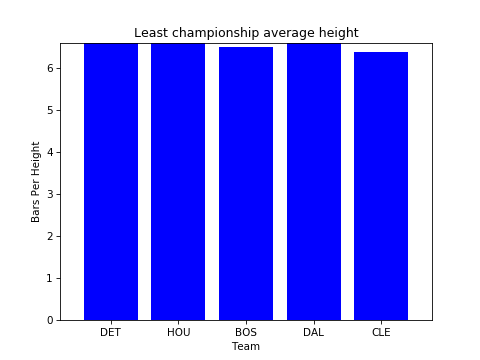

<BarContainer object of 5 artists>

In [341]:
# Create a bar chart based upon the above data
plt.bar(x_axis, nba_college_champions_ave_height, color="b", align="center")

In [342]:
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, nba_college_champions)

([<matplotlib.axis.XTick at 0x291ee7444a8>,
 <a list of 5 Text xticklabel objects>)

In [353]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 4.75)

In [354]:
# Set the limits of the y axis
plt.ylim(0, max(nba_college_champions_ave_height)+0.4)

(0, 6.6000000000000005)

In [355]:
# Give the chart a title, x label, and y label
plt.title("Most championship average height")
plt.xlabel("Team")
plt.ylabel("Bars Per Height")

Text(41.79166666666667, 0.5, 'Bars Per Height')

In [356]:
plt.savefig("mostchampionship.png", box_inche="tight")
plt.show()

In [357]:
#Average height of least win
nba_college_champions = ["DET", "HOU", "BOS", "DAL", "CLE"]
nba_college_champions_ave_height = [6.6, 5.11, 6.5, 7.2, 6.4]
x_axis = np.arange(len(nba_college_champions_ave_height))

In [358]:
# Create a bar chart based upon the above data
plt.bar(x_axis, nba_college_champions_ave_height, color="b", align="center")

<BarContainer object of 5 artists>

In [359]:
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, nba_college_champions)

([<matplotlib.axis.XTick at 0x291ee7444a8>,
 <a list of 5 Text xticklabel objects>)

In [360]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 4.75)

In [361]:
# Give the chart a title, x label, and y label
plt.title("Least championship average height")
plt.xlabel("Team")
plt.ylabel("Bars Per Height")

Text(41.79166666666667, 0.5, 'Bars Per Height')

In [362]:
# Save an image of the chart and print it to the screen
plt.savefig("leastchampionship.png", box_inche="tight")
plt.show()